# Pandas Datareader

- [Datareader](https://riptutorial.com/pandas/topic/1912/pandas-datareader)
- [yfinance](https://aroussi.com/post/python-yahoo-finance)

The Pandas datareader is a sub package that allows one to create a dataframe from various internet datasources, currently including:

Yahoo! Finance
Google Finance
St.Louis FED (FRED)
Kenneth French’s data library
World Bank
Google Analytics
For more information, [see here.](http://pandas.pydata.org/pandas-docs/stable/remote_data.html#remote-data-access)



## Get data

In [63]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

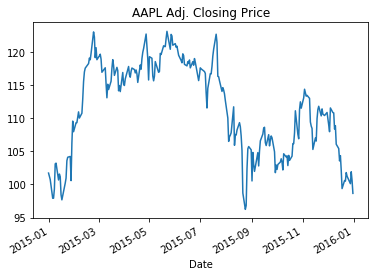

In [4]:
# Only get the adjusted close.
aapl = data.DataReader("AAPL", 
                       start='2015-1-1', 
                       end='2015-12-31', 
                       data_source='yahoo')['Adj Close']

aapl.plot(title='AAPL Adj. Closing Price')

## Convert the adjusted closing prices to cumulative returns.

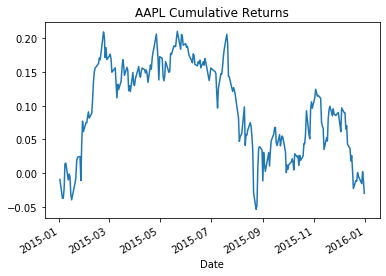

In [3]:
# Convert the adjusted closing prices to cumulative returns.
returns = aapl.pct_change()
((1 + returns).cumprod() - 1).plot(title='AAPL Cumulative Returns')

##  download data for multiple tickers 

In [25]:
from datetime import datetime
import pandas_datareader.data as wb

stocklist = ['AAPL','GOOG','FB','AMZN','COP']

start = datetime(2016,6,8)
end = datetime(2016,6,11)

p = wb.DataReader(stocklist, 'yahoo',start,end)

In [26]:
# p - is a pandas panel,

p.axes

[DatetimeIndex(['2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10'], dtype='datetime64[ns]', name='Date', freq=None),
 MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['AAPL', 'AMZN', 'COP', 'FB', 'GOOG']],
            labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
            names=['Attributes', 'Symbols'])]

In [30]:
p.keys()

MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['AAPL', 'AMZN', 'COP', 'FB', 'GOOG']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['Attributes', 'Symbols'])

## selecting & slicing data

In [8]:
p['Adj Close']

Symbols,AAPL,AMZN,COP,FB,GOOG
Date,,,,,
2016-06-07,93.890488,723.739990,44.484852,117.760002,716.650024
2016-06-08,93.805161,726.640015,44.438061,118.389999,728.280029
2016-06-09,94.478317,727.650024,43.577187,118.559998,728.580017
2016-06-10,93.700874,717.909973,41.649570,116.620003,719.409973


In [9]:
p['Volume']

Symbols,AAPL,AMZN,COP,FB,GOOG
Date,,,,,
2016-06-07,22409500,2732500,11227800,17103000,1336200
2016-06-08,20848100,2223400,9641000,14505600,1583700
2016-06-09,26601400,2170300,5425100,13859200,988900
2016-06-10,31712900,3425700,9008300,18510800,1216400


In [27]:
p[:,:,'AAPL']

KeyError: 'Key length (3) exceeds index depth (2)'

In [28]:
p[:,'2016-06-10']

TypeError: '(slice(None, None, None), '2016-06-10')' is an invalid key

## Dividend (เงินปันผล)

In [33]:
from pandas_datareader import data

df = data.DataReader('PTT.BK', 'yahoo-dividends')
df.head()

,action,value
2019-03-06,DIVIDEND,1.2
2018-10-11,DIVIDEND,0.8
2018-03-06,DIVIDEND,1.2
2017-08-31,DIVIDEND,0.8
2017-03-29,DIVIDEND,1.0


## Dividends and Stock Splits (+Splits)

In [32]:
from pandas_datareader import data

df = data.DataReader('PTT.BK', 'yahoo-actions')
df.head()

,action,value
2019-03-06,DIVIDEND,1.2
2018-10-11,DIVIDEND,0.8
2018-04-24,SPLIT,10.0
2018-03-06,DIVIDEND,1.2
2017-08-31,DIVIDEND,0.8


- [SIMPLE PYTHON SCRIPT TO RETRIEVE ALL STOCKS DATA FROM GOOGLE FINANCE SCREENER]((https://simply-python.com/2015/09/26/simple-python-script-to-retrieve-all-stocks-data-from-google-finance-screener/))
- https://www.learndatasci.com/tutorials/python-finance-part-2-intro-quantitative-trading-strategies/
- https://towardsdatascience.com/python-for-finance-stock-portfolio-analyses-6da4c3e61054
- https://www.pydoc.io/pypi/pandas-datareader-0.4.0/autoapi/data/index.html

# Python to download financial data

- https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/

In [13]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
print(pd.datetime.today())

2019-08-27 14:45:20.852300


## Getting the Data

In [4]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2014-01-01'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source="yahoo", start="2009-01-01")
panel_data.head(9)

Attributes       High                               Low             \
Symbols          AAPL       MSFT       ^GSPC       AAPL       MSFT   
Date                                                                 
2008-12-31  12.534286  19.680000  910.320007  12.191428  19.270000   
2009-01-02  13.005714  20.400000  934.729980  12.165714  19.370001   
2009-01-05  13.740000  20.670000  936.630005  13.244286  20.059999   
2009-01-06  13.881429  21.000000  943.849976  13.198571  20.610001   
2009-01-07  13.214286  20.290001  927.450012  12.894286  19.480000   
2009-01-08  13.307143  20.190001  910.000000  12.862857  19.549999   
2009-01-09  13.340000  20.299999  911.929993  12.877143  19.410000   
2009-01-12  12.998571  19.790001  890.400024  12.507143  19.299999   
2009-01-13  12.820000  19.990000  877.020020  12.335714  19.520000   

Attributes                   Open                             Close  \
Symbols          ^GSPC       AAPL       MSFT       ^GSPC       AAPL   
Date                                                                  
2008-12-31  889.669983  12.281428  19.309999  890.590027  12.192857   
2009-01-02  899.349976  12.268572  19.530001  902.989990  12.964286   
2009-01-05  919.530029  13.310000  20.200001  929.169983  13.511429   
2009-01-06  927.280029  13.707143  20.750000  931.169983  13.288571   
2009-01-07  902.369995  13.115714  20.190001  927.450012  13.001429   
2009-01-08  896.809998  12.918571  19.629999  905.729980  13.242857   
2009-01-09  888.309998  13.315714  20.170000  909.909973  12.940000   
2009-01-12  864.320007  12.922857  19.709999  890.400024  12.665714   
2009-01-13  862.020020  12.605714  19.520000  869.789978  12.530000   

Attributes                              Volume                            \
Symbols          MSFT       ^GSPC         AAPL        MSFT         ^GSPC   
Date                                                                       
2008-12-31  19.440001  903.250000  151885300.0  46419000.0  4.172940e+09   
2009-01-02  20.330000  931.799988  186503800.0  50084000.0  4.048270e+09   
2009-01-05  20.520000  927.450012  295402100.0  61475200.0  5.413910e+09   
2009-01-06  20.760000  934.700012  322327600.0  58083400.0  5.392620e+09   
2009-01-07  19.510000  906.650024  188262200.0  72709900.0  4.704940e+09   
2009-01-08  20.120001  909.729980  168375200.0  70255400.0  4.991550e+09   
2009-01-09  19.520000  890.349976  136711400.0  49815300.0  4.716500e+09   
2009-01-12  19.469999  870.260010  154429100.0  52163500.0  4.725050e+09   
2009-01-13  19.820000  871.789978  199599400.0  65843500.0  5.567460e+09   

Attributes  Adj Close                         
Symbols          AAPL       MSFT       ^GSPC  
Date                                          
2008-12-31  10.640865  15.001460  903.250000  
2009-01-02  11.314104  15.688256  931.799988  
2009-01-05  11.791602  15.834874  927.450012  
2009-01-06  11.597112  16.020086  934.700012  
2009-01-07  11.346518  15.055480  906.650024  
2009-01-08  11.557216  15.526204  909.729980  
2009-01-09  11.292908  15.063194  890.349976  
2009-01-12  11.053535  15.024609  870.260010  
2009-01-13  10.935095  15.294700  871.789978

In [7]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.

close = panel_data['Close']
close.head()

Symbols,AAPL,MSFT,^GSPC
Date,,,
2008-12-31,12.192857,19.440001,903.250000
2009-01-02,12.964286,20.330000,931.799988
2009-01-05,13.511429,20.520000,927.450012
2009-01-06,13.288571,20.760000,934.700012
2009-01-07,13.001429,19.510000,906.650024


# Preparing the Data (เตรียมข้อมูล)

In [17]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

print(all_weekdays)

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-06',
               '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
               '2014-01-13', '2014-01-14',
               ...
               '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-19',
               '2019-08-20', '2019-08-21', '2019-08-22', '2019-08-23',
               '2019-08-26', '2019-08-27'],
              dtype='datetime64[ns]', length=1475, freq='B')


In [18]:
close.head(10)

Symbols,AAPL,MSFT,^GSPC
2014-01-01,NaN,NaN,NaN
2014-01-02,79.018570,37.160000,1831.979980
2014-01-03,77.282860,36.910000,1831.369995
2014-01-06,77.704285,36.130001,1826.770020
2014-01-07,77.148575,36.410000,1837.880005
2014-01-08,77.637146,35.759998,1837.489990
2014-01-09,76.645714,35.529999,1838.130005
2014-01-10,76.134285,36.040001,1842.369995
2014-01-13,76.532860,34.980000,1819.199951
2014-01-14,78.055717,35.779999,1838.880005


## Looking at the Data [describe()]

In [19]:
close.describe()

Symbols,AAPL,MSFT,^GSPC
count,1474.000000,1474.000000,1474.000000
mean,137.758703,70.332598,2323.328310
std,39.969330,28.407047,350.044741
min,71.397141,34.980000,1741.890015
25%,106.767500,46.742501,2043.542511
50%,126.834999,59.205000,2181.094971
75%,171.584999,93.777498,2670.082397
max,232.070007,141.339996,3025.860107


## plot Stock time-series

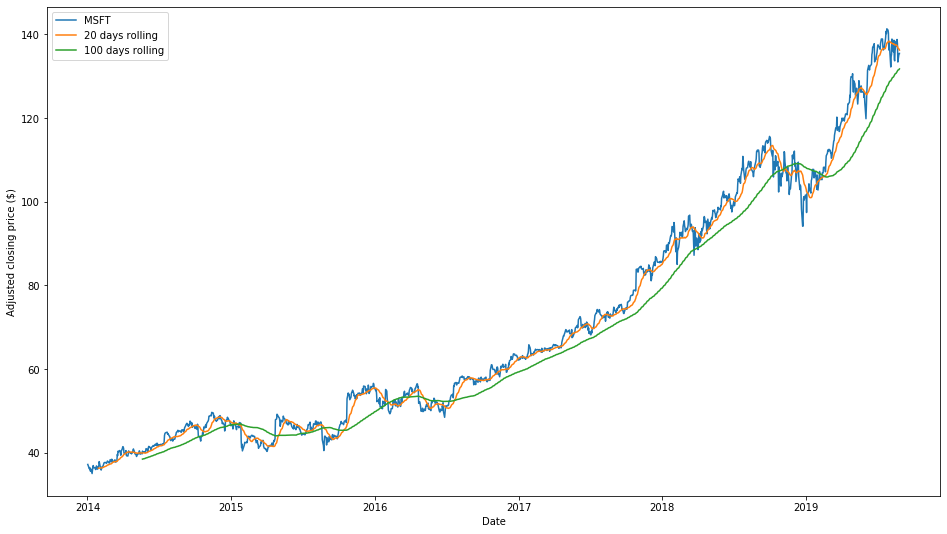

In [20]:
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'MSFT']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2014-01-01'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
df= data.DataReader(tickers, data_source="yahoo", start=start_date)['Close']
df.head(9)

Symbols,AAPL,MSFT,^GSPC
Date,,,
2013-12-31,80.145714,37.410000,1848.359985
2014-01-02,79.018570,37.160000,1831.979980
2014-01-03,77.282860,36.910000,1831.369995
2014-01-06,77.704285,36.130001,1826.770020
2014-01-07,77.148575,36.410000,1837.880005
2014-01-08,77.637146,35.759998,1837.489990
2014-01-09,76.645714,35.529999,1838.130005
2014-01-10,76.134285,36.040001,1842.369995
2014-01-13,76.532860,34.980000,1819.199951


## Calculating the short-window moving average

In [37]:
# Calculating the short-window moving average
short_rolling = df.rolling(window=20).mean()
short_rolling.head()

Symbols,AAPL,MSFT,^GSPC
Date,,,
2013-12-31,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN


In [38]:
# Calculating the short-window moving average
long_rolling = df.rolling(window=100).mean()
long_rolling.tail()

Symbols,AAPL,MSFT,^GSPC
Date,,,
2019-08-20,198.3035,130.6198,2908.984492
2019-08-21,198.5304,130.8283,2909.884792
2019-08-22,198.7426,131.0159,2910.442393
2019-08-23,198.8288,131.1579,2910.241094
2019-08-26,198.9402,131.3127,2910.290894


## Relative returns

In [48]:
# Relative returns

returns =  df.diff()
returns.head()

Symbols,AAPL,MSFT,^GSPC
Date,,,
2013-12-31,NaN,NaN,NaN
2014-01-02,-1.127144,-0.250000,-16.380005
2014-01-03,-1.735710,-0.250000,-0.609985
2014-01-06,0.421425,-0.779999,-4.599976
2014-01-07,-0.555710,0.279999,11.109985


## Compute Log returns

In [32]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations

log_returns = np.log(df).diff()
log_returns.head()

Symbols,AAPL,MSFT,^GSPC
Date,,,
2013-12-31,NaN,NaN,NaN
2014-01-02,-0.014164,-0.006705,-0.008901
2014-01-03,-0.022211,-0.006750,-0.000333
2014-01-06,0.005438,-0.021359,-0.002515
2014-01-07,-0.007177,0.007720,0.006063


OptionError: "No such keys(s): 'compute.use_numexpr'"

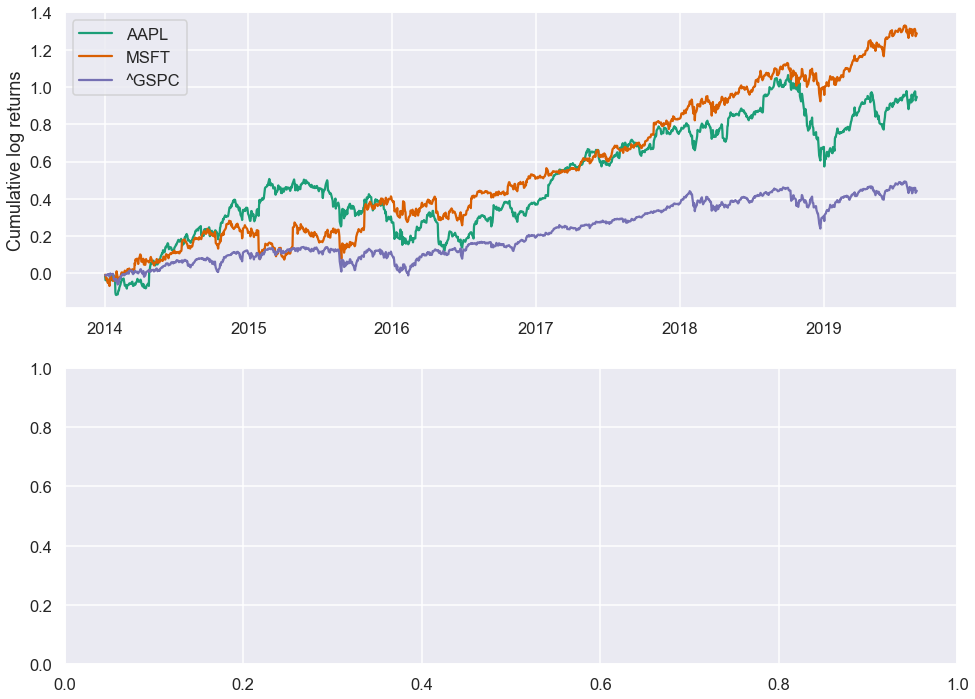

In [49]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

# Quantitative trading strateg

- https://www.learndatasci.com/tutorials/python-finance-part-2-intro-quantitative-trading-strategies/

In [50]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(1).transpose()
r_t

Date,2019-08-26 00:00:00
Symbols,
AAPL,0.018821
MSFT,0.015325
^GSPC,0.010923


In [51]:
# Weights as defined above
weights_vector = pd.DataFrame(1 / 3, index=r_t.index, columns=r_t.columns)
weights_vector

Date,2019-08-26 00:00:00
Symbols,
AAPL,0.333333
MSFT,0.333333
^GSPC,0.333333


In [52]:
# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

Date,2019-08-26 00:00:00
Date,
2019-08-26,0.015023


## example

In [54]:
weights_matrix = pd.DataFrame(1 / 3, index=df.index, columns=df.columns)
weights_matrix.tail()

Symbols,AAPL,MSFT,^GSPC
Date,,,
2019-08-20,0.333333,0.333333,0.333333
2019-08-21,0.333333,0.333333,0.333333
2019-08-22,0.333333,0.333333,0.333333
2019-08-23,0.333333,0.333333,0.333333
2019-08-26,0.333333,0.333333,0.333333


In [55]:
log_returns.head()

Symbols,AAPL,MSFT,^GSPC
Date,,,
2013-12-31,NaN,NaN,NaN
2014-01-02,-0.014164,-0.006705,-0.008901
2014-01-03,-0.022211,-0.006750,-0.000333
2014-01-06,0.005438,-0.021359,-0.002515
2014-01-07,-0.007177,0.007720,0.006063


In [56]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.head().iloc[:, 0:5]

Date,2013-12-31 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00
Date,,,,,
2013-12-31,NaN,-0.009923,-0.009765,-0.006145,0.002202
2014-01-02,NaN,-0.009923,-0.009765,-0.006145,0.002202
2014-01-03,NaN,-0.009923,-0.009765,-0.006145,0.002202
2014-01-06,NaN,-0.009923,-0.009765,-0.006145,0.002202
2014-01-07,NaN,-0.009923,-0.009765,-0.006145,0.002202


In [57]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

Date
2019-08-20   -0.005414
2019-08-21    0.010026
2019-08-22   -0.002886
2019-08-23   -0.035331
2019-08-26    0.015023
dtype: float64

OptionError: "No such keys(s): 'compute.use_numexpr'"

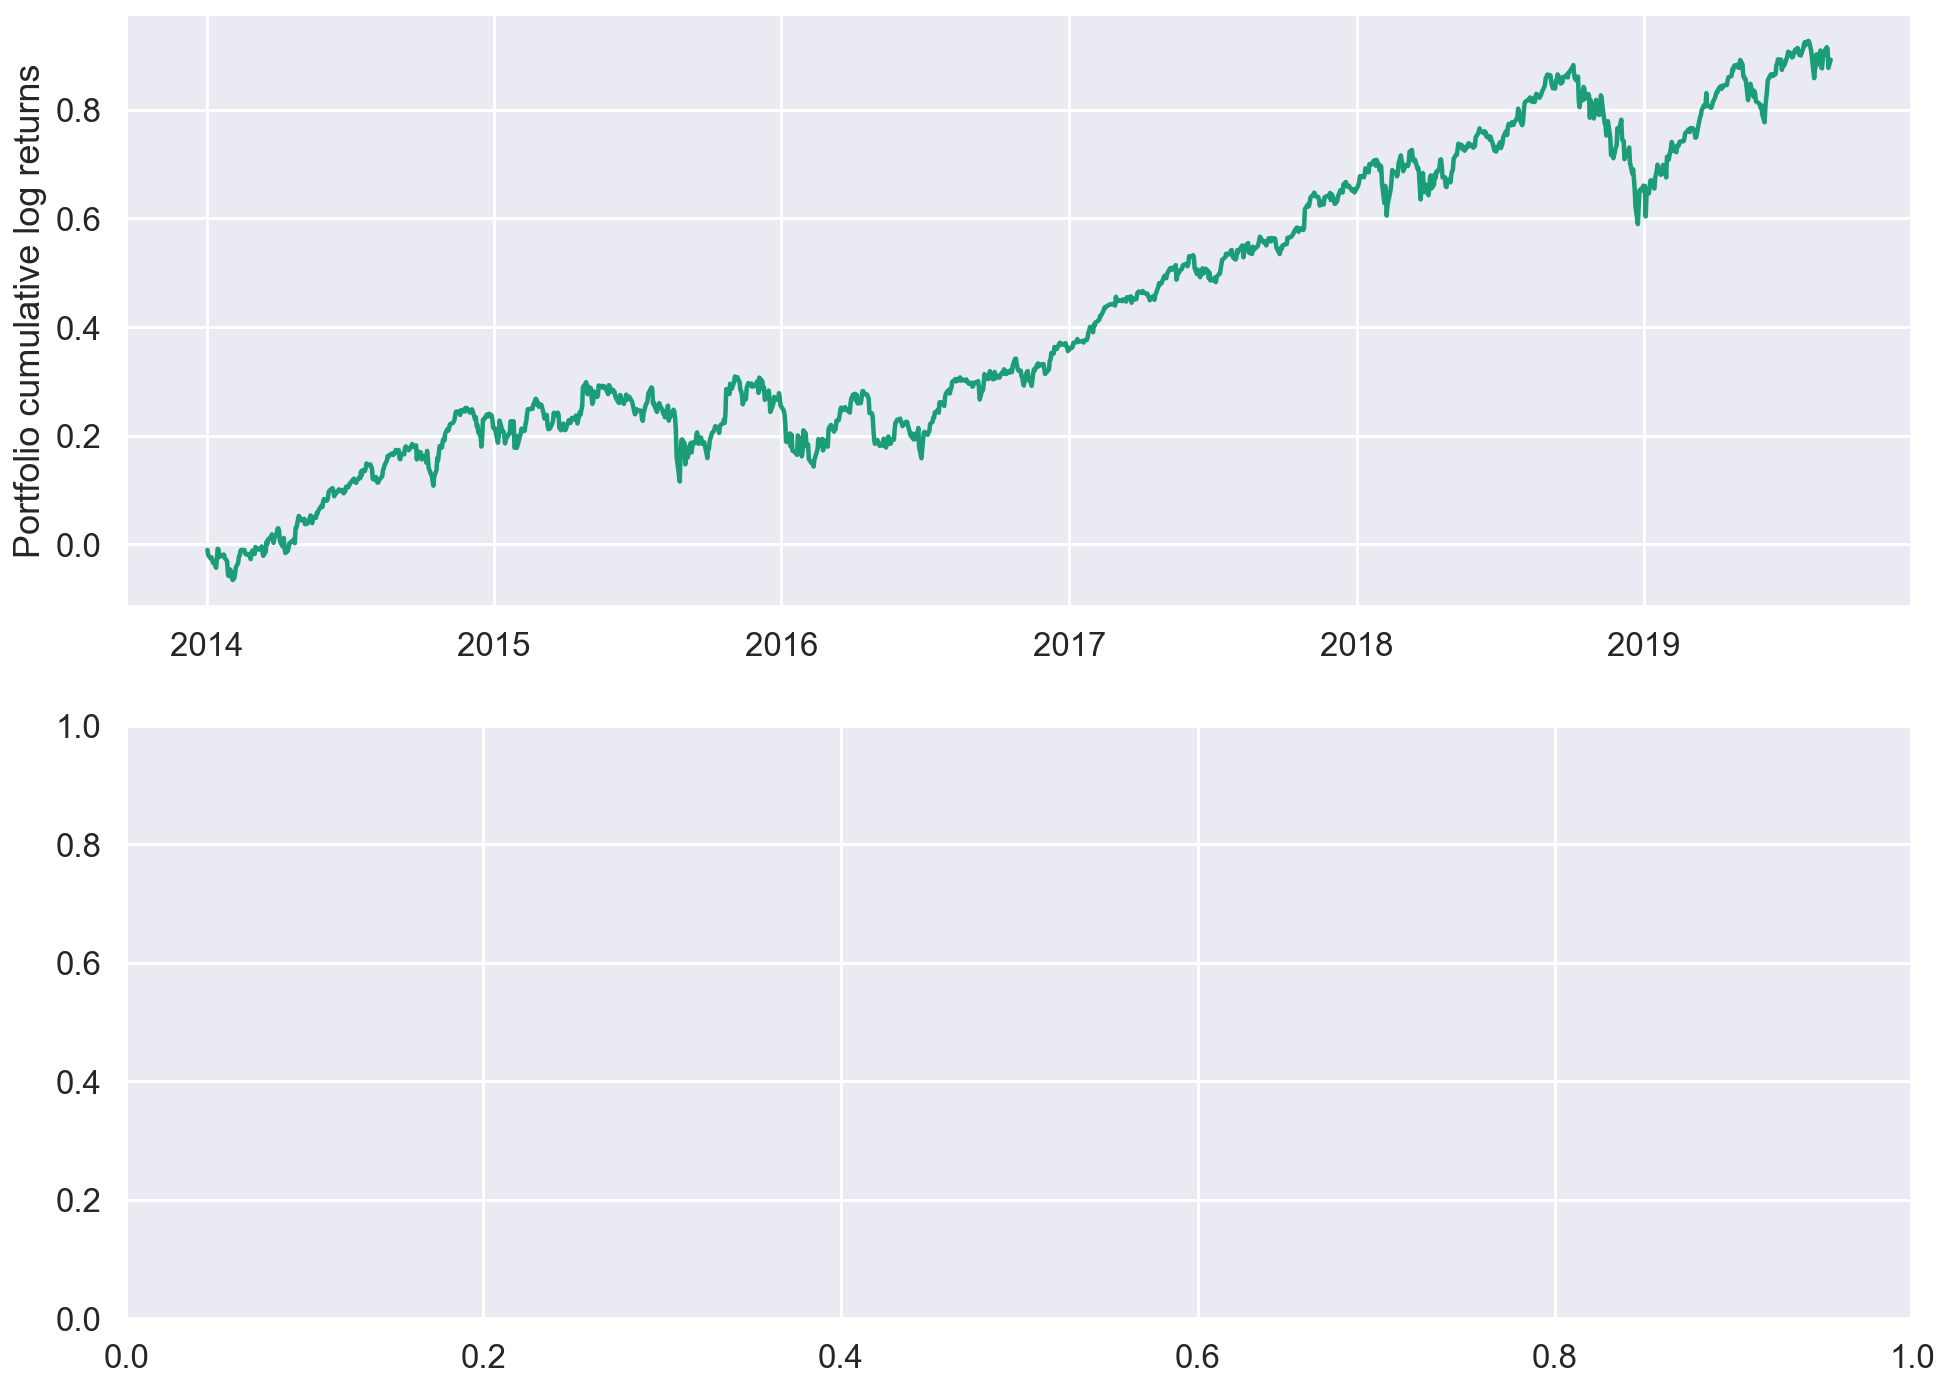

In [65]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) )

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

# [yfinance](https://github.com/ranaroussi/yfinance)

Reliably download historical market data from Yahoo! Finance with Python

- https://github.com/ranaroussi/yfinance
- https://aroussi.com/post/python-yahoo-finance

In [70]:
import yfinance as yf

msft = yf.Ticker("MSFT")

In [71]:
# get stock info
msft.info

"""
returns:
{
 'quoteType': 'EQUITY',
 'quoteSourceName': 'Nasdaq Real Time Price',
 'currency': 'USD',
 'shortName': 'Microsoft Corporation',
 'exchangeTimezoneName': 'America/New_York',
  ...
 'symbol': 'MSFT'
}
"""

{'language': 'en-US',
 'region': 'US',
 'quoteType': 'EQUITY',
 'quoteSourceName': 'Delayed Quote',
 'regularMarketDayLow': 133.9125,
 'currency': 'USD',
 'preMarketChange': -0.33999634,
 'preMarketChangePercent': -0.25101244,
 'preMarketTime': 1566895199,
 'regularMarketChangePercent': 1.5443418,
 'regularMarketDayRange': '133.9125 - 135.56',
 'bid': 135.16,
 'regularMarketPreviousClose': 133.39,
 'ask': 135.45,
 'bidSize': 29,
 'askSize': 10,
 'messageBoardId': 'finmb_21835',
 'fullExchangeName': 'NasdaqGS',
 'longName': 'Microsoft Corporation',
 'financialCurrency': 'USD',
 'averageDailyVolume3Month': 24720465,
 'averageDailyVolume10Day': 23002500,
 'priceHint': 2,
 'preMarketPrice': 135.11,
 'earningsTimestamp': 1563494400,
 'earningsTimestampStart': 1571756340,
 'earningsTimestampEnd': 1572278400,
 'trailingAnnualDividendRate': 1.84,
 'trailingPE': 26.768774,
 'trailingAnnualDividendYield': 0.013794138,
 'regularMarketPrice': 135.45,
 'marketState': 'PRE',
 'exchange': 'NMS',
 'bo

In [4]:
import yfinance as yf
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30",
                   group_by="ticker")
data

[*********************100%***********************]  2 of 2 downloaded


AAPL                                                 SPY  \
              Open    High     Low   Close Adj Close    Volume    Open   
Date                                                                     
2017-01-03  115.80  116.33  114.76  116.15    111.29  28781900  225.04   
2017-01-04  115.85  116.51  115.75  116.02    111.16  21118100  225.62   
2017-01-05  115.92  116.86  115.81  116.61    111.73  22193600  226.27   
2017-01-06  116.78  118.16  116.47  117.91    112.97  31751900  226.53   
2017-01-09  117.95  119.43  117.94  118.99    114.01  33561900  226.91   
...            ...     ...     ...     ...       ...       ...     ...   
2017-04-24  143.50  143.95  143.18  143.64    138.22  17134300  237.18   
2017-04-25  143.91  144.90  143.87  144.53    139.08  18871500  237.91   
2017-04-26  144.47  144.60  143.38  143.68    138.26  20041200  238.51   
2017-04-27  143.92  144.16  143.31  143.79    138.37  14246300  238.77   
2017-04-28  144.09  144.30  143.27  143.65    138.23  20860400  238.90   

                                                         
              High     Low   Close Adj Close     Volume  
Date                                                     
2017-01-03  225.83  223.88  225.24    214.83   91366500  
2017-01-04  226.75  225.61  226.58    216.11   78744400  
2017-01-05  226.58  225.48  226.40    215.94   78379000  
2017-01-06  227.75  225.90  227.21    216.71   71559900  
2017-01-09  227.07  226.42  226.46    215.99   46939700  
...            ...     ...     ...       ...        ...  
2017-04-24  237.41  234.56  237.17    227.19  119209900  
2017-04-25  238.95  237.81  238.55    228.51   76698300  
2017-04-26  239.53  238.35  238.40    228.37   84702500  
2017-04-27  238.95  237.98  238.60    228.56   57410300  
2017-04-28  238.93  237.93  238.08    228.06   63532800  

[81 rows x 12 columns]

In [5]:
data['SPY']['Close']

Date
2017-01-03    225.24
2017-01-04    226.58
2017-01-05    226.40
2017-01-06    227.21
2017-01-09    226.46
               ...  
2017-04-24    237.17
2017-04-25    238.55
2017-04-26    238.40
2017-04-27    238.60
2017-04-28    238.08
Name: Close, Length: 81, dtype: float64

## get historical market data

In [13]:
goog = yf.Ticker("goog")
goog.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,44871300,0,0.0
2004-08-20,50.316402,54.336334,50.062355,53.952770,22942800,0,0.0
2004-08-23,55.168217,56.528118,54.321388,54.495735,18342800,0,0.0
2004-08-24,55.412300,55.591629,51.591621,52.239193,15319700,0,0.0
2004-08-25,52.284027,53.798351,51.746044,52.802086,9232100,0,0.0
...,...,...,...,...,...,...,...
2019-08-20,1195.250000,1196.060059,1182.109985,1182.689941,915500,0,0.0
2019-08-21,1193.150024,1199.000000,1187.430054,1191.250000,740700,0,0.0
2019-08-22,1194.069946,1198.011963,1178.579956,1189.530029,947500,0,0.0


In [14]:
goog.info

{'language': 'en-US',
 'region': 'US',
 'quoteType': 'EQUITY',
 'quoteSourceName': 'Delayed Quote',
 'currency': 'USD',
 'twoHundredDayAverageChange': 12.214233,
 'epsForward': 55.79,
 'twoHundredDayAverageChangePercent': 0.010559773,
 'esgPopulated': False,
 'tradeable': True,
 'triggerable': True,
 'regularMarketChangePercent': 1.5287178,
 'regularMarketDayRange': '1152.96 - 1169.47',
 'regularMarketPreviousClose': 1151.29,
 'bid': 1161.04,
 'ask': 1169.84,
 'bidSize': 8,
 'askSize': 8,
 'messageBoardId': 'finmb_29096',
 'fullExchangeName': 'NasdaqGS',
 'longName': 'Alphabet Inc.',
 'financialCurrency': 'USD',
 'averageDailyVolume3Month': 1518654,
 'averageDailyVolume10Day': 1124733,
 'fiftyTwoWeekLowChange': 198.78003,
 'fiftyTwoWeekLowChangePercent': 0.20490463,
 'fiftyTwoWeekRange': '970.11 - 1289.27',
 'fiftyTwoWeekHighChange': -120.380005,
 'fiftyTwoWeekHighChangePercent': -0.09337067,
 'fiftyTwoWeekLow': 970.11,
 'fiftyTwoWeekHigh': 1289.27,
 'shortName': 'Alphabet Inc.',
 'sha

In [15]:
goog.actions

,Dividends,Stock Splits
Date,,
2014-03-27,0.0,2.002
2015-04-27,0.0,1.000


In [16]:
goog.dividends

Series([], Name: Dividends, dtype: int64)

In [17]:
goog.splits

Date
2014-03-27    2.002
2015-04-27    1.000
Name: Stock Splits, dtype: float64

## show financials

In [18]:
# show financials
goog.financials


,12/31/2018,12/31/2017,12/31/2016,12/31/2015
,,,,
Total Revenue,136819000,110855000,90272000,74989000
Cost of Revenue,59549000,45583000,35138000,28164000
Gross Profit,77270000,65272000,55134000,46825000
Operating Expenses,-,-,-,-
Research Development,21419000,16625000,13948000,12282000
Selling General and Administrative,24459000,19765000,17470000,15183000
Non Recurring,NaN,NaN,NaN,NaN
Others,NaN,NaN,NaN,NaN
Total Operating Expenses,105427000,81973000,66556000,55629000


## show balance heet

In [19]:
# show balance heet
goog.balance_sheet

,12/31/2018,12/31/2017,12/31/2016,12/31/2015
,,,,
Current Assets,-,-,-,-
Cash And Cash Equivalents,16701000,10715000,12918000,15409000
Short Term Investments,92439000,91156000,73415000,56517000
Net Receivables,21193000,18705000,15632000,13459000
Inventory,1107000,749000,268000,491000
Other Current Assets,4236000,2983000,3175000,1590000
Total Current Assets,135676000,124308000,105408000,90114000
Long Term Investments,13859000,7813000,5878000,5183000
"Property, plant and equipment",59719000,42383000,34234000,29016000


## show cashflow

In [20]:
# show cashflow
goog.cashflow

,12/31/2018,12/31/2017,12/31/2016,12/31/2015
,,,,
Net Income,30736000,12662000,19478000,16348000
"Operating Activities, Cash Flows Provided By or Used In",-,-,-,-
Depreciation,9029000,6899000,6100000,5024000
Adjustments To Net Income,3298000,8284000,7158000,5609000
Changes In Accounts Receivables,-2169000,-3768000,-2578000,-2094000
Changes In Liabilities,1438000,1121000,333000,246000
Changes In Inventories,NaN,NaN,NaN,NaN
Changes In Other Operating Activities,7890000,3682000,2420000,1618000
Total Cash Flow From Operating Activities,47971000,37091000,36036000,26572000


In [21]:
# show options expirations
goog.options

('2019-08-30',
 '2019-09-06',
 '2019-09-13',
 '2019-09-20',
 '2019-09-27',
 '2019-10-04',
 '2019-10-18',
 '2019-11-15',
 '2019-12-01',
 '2019-12-20',
 '2020-01-17',
 '2020-03-20',
 '2020-06-19',
 '2020-12-01',
 '2021-01-15',
 '2021-06-18')

In [10]:
msft = yf.Ticker("ptt.bk")
msft.info

{'language': 'en-US',
 'region': 'US',
 'quoteType': 'EQUITY',
 'currency': 'THB',
 'longName': 'PTT Public Company Limited',
 'financialCurrency': 'THB',
 'averageDailyVolume3Month': 47197128,
 'averageDailyVolume10Day': 50562750,
 'fiftyTwoWeekLowChange': 0.0,
 'fiftyTwoWeekLowChangePercent': 0.0,
 'fiftyTwoWeekRange': '40.75 - 55.25',
 'fiftyTwoWeekHighChange': -14.5,
 'fiftyTwoWeekHighChangePercent': -0.26244345,
 'fiftyTwoWeekLow': 40.75,
 'fiftyTwoWeekHigh': 55.25,
 'earningsTimestamp': 1573480800,
 'earningsTimestampStart': 1550480400,
 'earningsTimestampEnd': 1550826000,
 'trailingAnnualDividendRate': 2.0,
 'trailingAnnualDividendYield': 0.048780486,
 'esgPopulated': False,
 'tradeable': False,
 'triggerable': False,
 'sharesOutstanding': 28562999296,
 'bookValue': 31.438,
 'fiftyDayAverage': 45.76389,
 'fiftyDayAverageChange': -5.0138893,
 'fiftyDayAverageChangePercent': -0.109559946,
 'twoHundredDayAverage': 47.43134,
 'twoHundredDayAverageChange': -6.6813393,
 'marketCap': 1

In [11]:
msft = yf.Ticker("^GSPC")
msft.info

{'language': 'en-US',
 'region': 'US',
 'quoteType': 'INDEX',
 'currency': 'USD',
 'shortName': 'S&P 500',
 'marketState': 'PRE',
 'market': 'us_market',
 'triggerable': True,
 'regularMarketChangePercent': 1.0982988,
 'regularMarketDayRange': '2856.0 - 2879.27',
 'regularMarketPreviousClose': 2847.11,
 'bid': 2841.45,
 'ask': 2927.22,
 'bidSize': 0,
 'askSize': 0,
 'messageBoardId': 'finmb_INDEXGSPC',
 'fullExchangeName': 'SNP',
 'averageDailyVolume3Month': 3485795000,
 'averageDailyVolume10Day': 3162691666,
 'fiftyTwoWeekLowChange': 531.7998,
 'fiftyTwoWeekLowChangePercent': 0.2266276,
 'fiftyTwoWeekRange': '2346.58 - 3027.98',
 'fiftyTwoWeekHighChange': -149.6001,
 'fiftyTwoWeekHighChangePercent': -0.049405906,
 'fiftyTwoWeekLow': 2346.58,
 'fiftyTwoWeekHigh': 3027.98,
 'priceHint': 2,
 'exchangeDataDelayedBy': 0,
 'fiftyDayAverage': 2947.9639,
 'fiftyDayAverageChange': -69.583984,
 'fiftyDayAverageChangePercent': -0.023604084,
 'twoHundredDayAverage': 2878.6685,
 'twoHundredDayAver

In [12]:
msft = yf.Ticker("thd")
msft.info

{'language': 'en-US',
 'region': 'US',
 'quoteType': 'ETF',
 'quoteSourceName': 'Delayed Quote',
 'currency': 'USD',
 'market': 'us_market',
 'shortName': 'iShares Inc iShares MSCI Thaila',
 'exchange': 'PCX',
 'regularMarketChangePercent': -0.53047544,
 'regularMarketDayRange': '87.82 - 88.29',
 'regularMarketPreviousClose': 88.6,
 'bid': 0.0,
 'ask': 0.0,
 'bidSize': 8,
 'askSize': 9,
 'messageBoardId': 'finmb_42891775',
 'fullExchangeName': 'NYSEArca',
 'longName': 'iShares MSCI Thailand Capped ETF',
 'averageDailyVolume3Month': 223579,
 'averageDailyVolume10Day': 126250,
 'fiftyTwoWeekLowChange': 7.1399994,
 'fiftyTwoWeekLowChangePercent': 0.088159025,
 'fiftyTwoWeekRange': '80.99 - 96.63',
 'fiftyTwoWeekHighChange': -8.5,
 'fiftyTwoWeekHighChangePercent': -0.0879644,
 'fiftyTwoWeekLow': 80.99,
 'fiftyTwoWeekHigh': 96.63,
 'ytdReturn': 15.02,
 'trailingThreeMonthReturns': 3.17,
 'trailingThreeMonthNavReturns': 4.78,
 'regularMarketPrice': 88.13,
 'regularMarketTime': 1566849600,
 '

In [ ]:
# access each ticker using (example)
tickers.msft.info
tickers.aapl.history(period="1mo")
tickers.goog.actions

# Load data from Pickle

In [6]:
import pickle

with open("data/sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
tickers[0:10]

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES']

## Example Download Stock Price and wirte to CSV (link downloads ใช้ไม่ได้แล้ว)

In [ ]:
import pandas as pd
import os
import datetime
from six.moves import urllib
import csv

def is_non_zero_file(fpath):  
    return os.path.isfile(fpath) and os.path.getsize(fpath) > 0

#input args:
#symbol     - string
#start_date - datetime
#end_date   - datetime
def download_data(symbol, start_date=datetime.datetime(2018,1,1), end_date=datetime.date.today()):
    file_path = "../investopedia_data/"+symbol+".csv"
    
    print("Downloading "+symbol)
    #if is_non_zero_file(file_path):
    #    print(file_path+" exists!")
    #    return
    
    url_prefix = "https://www.investopedia.com/markets/api/partial/historical/?"
    url_symbol = "Symbol="+symbol
    url_type = "&Type=%20Historical+Prices"
    url_timeframe = "&Timeframe=Daily"
    
    #"%b" get month short name
    #"%B" get month full name
    url_date_lambda = lambda date : date.strftime("%b")+"+"+date.strftime("%d")+"%2C+"+date.strftime("%y")
    url_start_date="&StartDate="+url_date_lambda(start_date)
    url_end_date="&EndDate="+url_date_lambda(end_date)
    
    url = url_prefix+url_symbol+url_type+url_timeframe+url_start_date+url_end_date
    
    req = urllib.request.Request(url)
    html_content = urllib.request.urlopen(req)
    dataframe_list = pd.read_html(html_content)
    dataframe = dataframe_list[0]
    dataframe.to_csv(file_path)
    
if __name__ == "__main__":
    download_data("AAPL",datetime.datetime(2018,8,1),datetime.date.today())

# Example Download Stock Price [Pickle + CSV]

In [68]:
#pip install yfinance
#pip install fix_yahoo_finance

In [ ]:
import bs4 as bs
import datetime as dt
import os
from pandas_datareader import data as pdr
import pickle
import requests
import fix_yahoo_finance as yf

yf.pdr_override

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers


# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    start = dt.datetime(2019, 6, 8)
    end = dt.datetime.now()
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


save_sp500_tickers()
get_data_from_yahoo()